In [122]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.dates as mdates
from sklearn.preprocessing import MaxAbsScaler

In [123]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [125]:
import pandas as pd

seven_day_plots_all = pd.read_csv("1st_7th_march_results_all.csv")
final_mse_all = pd.read_csv("final_MSEs.csv")


# Plotting final mse for all models

In [126]:
final_mse_all.set_index('site', inplace=True)
final_mse_all 

,gru_mse,lstm_mse,rf_mse,arimax_mse,average_mse_per_site
site,,,,,
2,0.016795,0.016070,0.0146,0.0170,0.016116
3,0.019325,0.024114,0.0211,0.0225,0.021760
6,0.021473,0.023208,0.0189,0.0427,0.026570
9,0.019201,0.021545,0.0266,0.0283,0.023911
11,0.018786,0.017435,0.0147,0.0118,0.015680
12,0.005084,0.003483,0.0066,0.0038,0.004742
16,0.033665,0.035975,0.0406,0.0774,0.046910
17,0.008330,0.008220,0.0101,0.0087,0.008838
20,0.019581,0.018185,0.0160,0.0243,0.019517


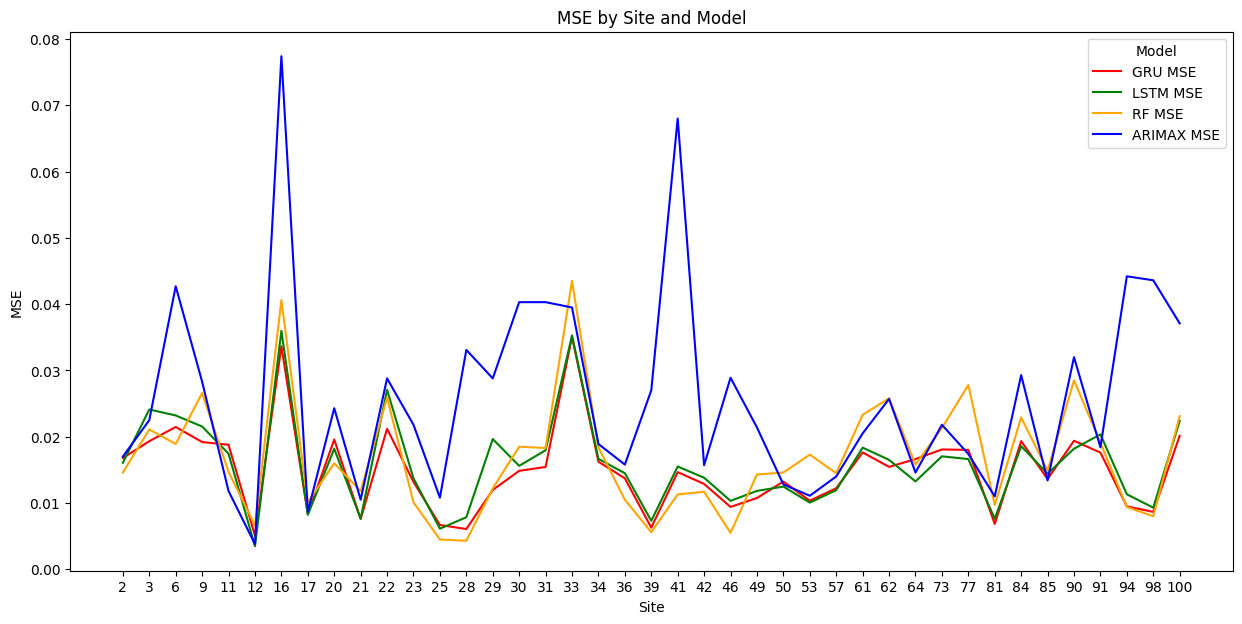

In [169]:
plt.figure(figsize=(15, 7))

# We need to ensure that 'site' is of type string if we want it to be displayed as categorical.
final_mse_all.index = final_mse_all.index.map(str)

# Plot each MSE metric
plt.plot(final_mse_all.index, final_mse_all['gru_mse'], label='GRU MSE', color='red', linewidth=1.5)
plt.plot(final_mse_all.index, final_mse_all['lstm_mse'], label='LSTM MSE', color='green', linewidth=1.5)
plt.plot(final_mse_all.index, final_mse_all['rf_mse'], label='RF MSE', color='orange', linewidth=1.5)
plt.plot(final_mse_all.index, final_mse_all['arimax_mse'], label='ARIMAX MSE', color='blue', linewidth=1.5)

# Labels & Title
plt.xlabel('Site')
plt.ylabel('MSE')
plt.title('MSE by Site and Model')

# Legend
plt.legend(title='Model')

# Display the plot
plt.show()

In [128]:
seven_day_plots_all

,ts,atcual_net_load_norm,RF_pred,ARIMAX_pred,LSTM_pred,GRU_pred,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU
0,2020-03-01 00:00:00+00:00,0.144937,0.170669,0.089987,0.162528,0.206903,0.025733,0.054950,0.017592,0.061966
1,2020-03-01 00:30:00+00:00,0.139616,0.165562,0.083148,0.178559,0.182361,0.025947,0.056468,0.038943,0.042746
2,2020-03-01 01:00:00+00:00,0.168242,0.173472,0.083269,0.162007,0.182518,0.005230,0.084973,0.006235,0.014277
3,2020-03-01 01:30:00+00:00,0.133450,0.179963,0.083362,0.172721,0.207759,0.046513,0.050088,0.039271,0.074308
4,2020-03-01 02:00:00+00:00,0.170335,0.165454,0.086696,0.175944,0.213783,0.004881,0.083639,0.005609,0.043449
...,...,...,...,...,...,...,...,...,...,...
331,2020-03-07 21:30:00+00:00,0.231236,0.203234,0.171344,0.182718,0.159614,0.028002,0.059892,0.048517,0.071622
332,2020-03-07 22:00:00+00:00,0.242491,0.203174,0.174072,0.182805,0.155892,0.039316,0.068419,0.059685,0.086598
333,2020-03-07 22:30:00+00:00,0.203136,0.204834,0.174072,0.182253,0.145108,0.001698,0.029064,0.020884,0.058028
334,2020-03-07 23:00:00+00:00,0.208876,0.183274,0.177047,0.182635,0.163371,0.025602,0.031829,0.026241,0.045506


## Setting ts as index for plotting

In [129]:
seven_day_plots_all.set_index('ts', inplace=True)
seven_day_plots_all.sort_index(inplace=True)
seven_day_plots_all.head()

,atcual_net_load_norm,RF_pred,ARIMAX_pred,LSTM_pred,GRU_pred,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU
ts,,,,,,,,,
2020-03-01 00:00:00+00:00,0.144937,0.170669,0.089987,0.162528,0.206903,0.025733,0.054950,0.017592,0.061966
2020-03-01 00:30:00+00:00,0.139616,0.165562,0.083148,0.178559,0.182361,0.025947,0.056468,0.038943,0.042746
2020-03-01 01:00:00+00:00,0.168242,0.173472,0.083269,0.162007,0.182518,0.005230,0.084973,0.006235,0.014277
2020-03-01 01:30:00+00:00,0.133450,0.179963,0.083362,0.172721,0.207759,0.046513,0.050088,0.039271,0.074308
2020-03-01 02:00:00+00:00,0.170335,0.165454,0.086696,0.175944,0.213783,0.004881,0.083639,0.005609,0.043449


In [130]:
# Convert the index to datetime if it's not already
seven_day_plots_all.index = pd.to_datetime(seven_day_plots_all.index)

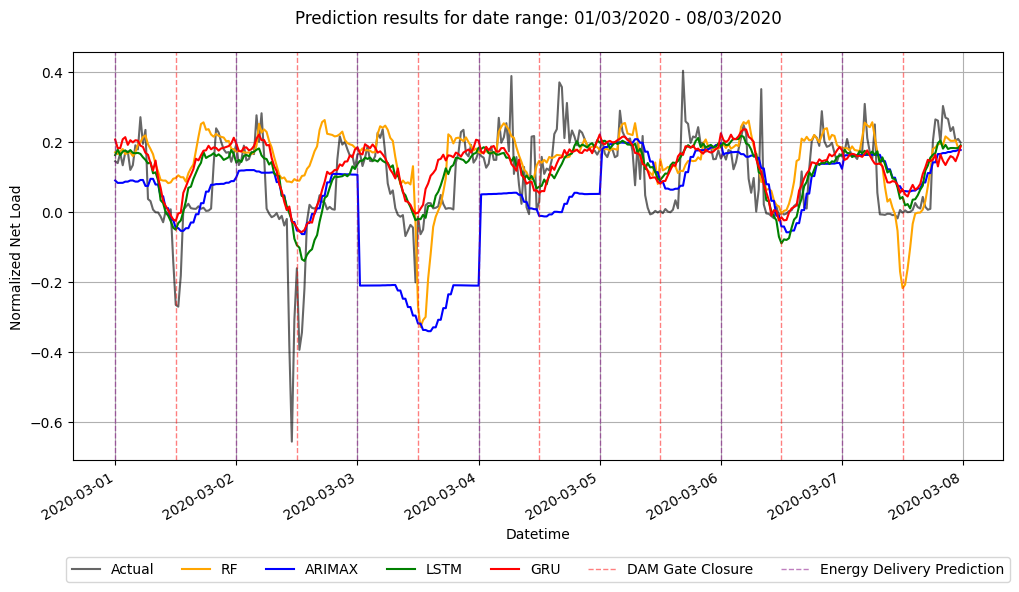

In [176]:
start_date = '2020-03-01'
end_date = '2020-03-07'

# Define the date format for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(seven_day_plots_all.index, seven_day_plots_all["atcual_net_load_norm"], label='Actual', color='black', alpha=0.6 , linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["RF_pred"], label='RF', color='orange', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["ARIMAX_pred"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["LSTM_pred"], label='LSTM', color='green', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["GRU_pred"], label='GRU', color='red', linewidth=1.5)

# Draw vertical lines for Dam Gate Closure and Energy Delivery Prediction
# For simplicity, I'll assume we add the lines within the already filtered date range
for day in pd.date_range(start=start_date, end=end_date):
    dam_closure_time = pd.Timestamp(day.strftime('%Y-%m-%d 12:00'))
    energy_delivery_time = pd.Timestamp(day.strftime('%Y-%m-%d 00:00'))
    plt.axvline(x=dam_closure_time, color='red', alpha = 0.5, linestyle='--', linewidth=1, label='DAM Gate Closure' if day == pd.Timestamp(start_date) else "")
    plt.axvline(x=energy_delivery_time, color='purple', alpha = 0.5, linestyle='--', linewidth=1, label='Energy Delivery Prediction' if day == pd.Timestamp(start_date) else "")


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1, 9)))  # Only show ticks for these days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(plt.NullLocator())  # Disable minor ticks

# Define the date format for the x-axis and rotate for better readability
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Datetime', y=1.05)
plt.ylabel('Normalized Net Load')
plt.title('Prediction results for date range: 01/03/2020 - 08/03/2020', y=1.05)
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))

# Show plot
plt.show()

# Seven day average net difference values

In [156]:
average_net_diff = pd.read_csv("Average_net_diff.csv")

average_net_diff.set_index('ts', inplace=True)
average_net_diff.sort_index(inplace=True)
average_net_diff.head()

,average_net_diff_RF,average_net_diff_ARIMAX,average_net_diff_LSTM,average_net_diff_GRU
ts,,,,
2020-03-01 00:00:00+00:00,0.017351,0.113569,0.024086,0.035682
2020-03-01 00:30:00+00:00,0.019779,0.085451,0.019262,0.023303
2020-03-01 01:00:00+00:00,0.024015,0.092014,0.024898,0.030904
2020-03-01 01:30:00+00:00,0.024885,0.087765,0.027143,0.037714
2020-03-01 02:00:00+00:00,0.015479,0.087965,0.017383,0.028245


In [164]:
# Convert the "ts" column to datetime format
average_net_diff.index = pd.to_datetime(average_net_diff.index)

# Extract only the hourly date
average_net_diff.index = average_net_diff.index.strftime('%H:%M:%S')

# Print the updated DataFrame
average_net_diff


,average_net_diff_RF,average_net_diff_ARIMAX,average_net_diff_LSTM,average_net_diff_GRU
ts,,,,
00:00:00,0.017351,0.113569,0.024086,0.035682
00:30:00,0.019779,0.085451,0.019262,0.023303
01:00:00,0.024015,0.092014,0.024898,0.030904
01:30:00,0.024885,0.087765,0.027143,0.037714
02:00:00,0.015479,0.087965,0.017383,0.028245
02:30:00,0.021461,0.096312,0.019681,0.027385
03:00:00,0.028071,0.088112,0.028548,0.042544
03:30:00,0.013256,0.087828,0.018809,0.033347
04:00:00,0.039421,0.151913,0.058522,0.049409


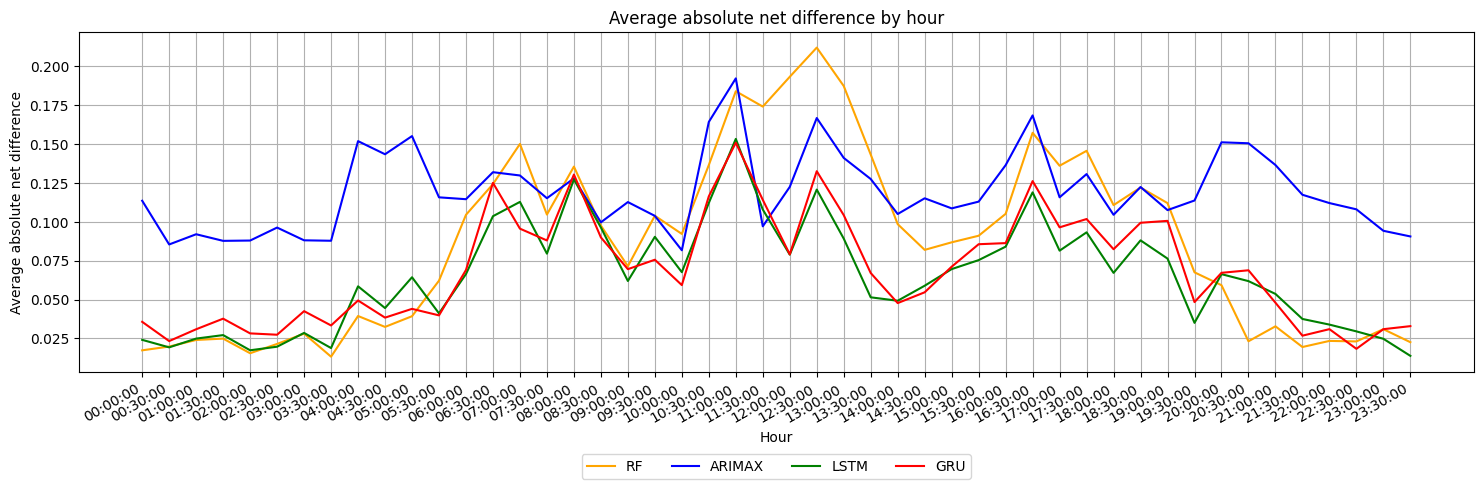

In [182]:
#plot average net difference for average_net_diff_RF	average_net_diff_ARIMAX	average_net_diff_LSTM	average_net_diff_GRU
plt.figure(figsize=(18, 5))
plt.plot(average_net_diff.index, average_net_diff["average_net_diff_RF"], label='RF', color='orange', linewidth=1.5)
plt.plot(average_net_diff.index, average_net_diff["average_net_diff_ARIMAX"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(average_net_diff.index, average_net_diff["average_net_diff_LSTM"], label='LSTM', color='green', linewidth=1.5)
plt.plot(average_net_diff.index, average_net_diff["average_net_diff_GRU"], label='GRU', color='red', linewidth=1.5)

plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Hour')
plt.ylabel('Average absolute net difference')
plt.title('Average absolute net difference by hour')
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))


# Display the plot
plt.show()

In [132]:
seven_day_plots_all



,atcual_net_load_norm,RF_pred,ARIMAX_pred,LSTM_pred,GRU_pred,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU
ts,,,,,,,,,
2020-03-01 00:00:00+00:00,0.144937,0.170669,0.089987,0.162528,0.206903,0.025733,0.054950,0.017592,0.061966
2020-03-01 00:30:00+00:00,0.139616,0.165562,0.083148,0.178559,0.182361,0.025947,0.056468,0.038943,0.042746
2020-03-01 01:00:00+00:00,0.168242,0.173472,0.083269,0.162007,0.182518,0.005230,0.084973,0.006235,0.014277
2020-03-01 01:30:00+00:00,0.133450,0.179963,0.083362,0.172721,0.207759,0.046513,0.050088,0.039271,0.074308
2020-03-01 02:00:00+00:00,0.170335,0.165454,0.086696,0.175944,0.213783,0.004881,0.083639,0.005609,0.043449
...,...,...,...,...,...,...,...,...,...
2020-03-07 21:30:00+00:00,0.231236,0.203234,0.171344,0.182718,0.159614,0.028002,0.059892,0.048517,0.071622
2020-03-07 22:00:00+00:00,0.242491,0.203174,0.174072,0.182805,0.155892,0.039316,0.068419,0.059685,0.086598
2020-03-07 22:30:00+00:00,0.203136,0.204834,0.174072,0.182253,0.145108,0.001698,0.029064,0.020884,0.058028


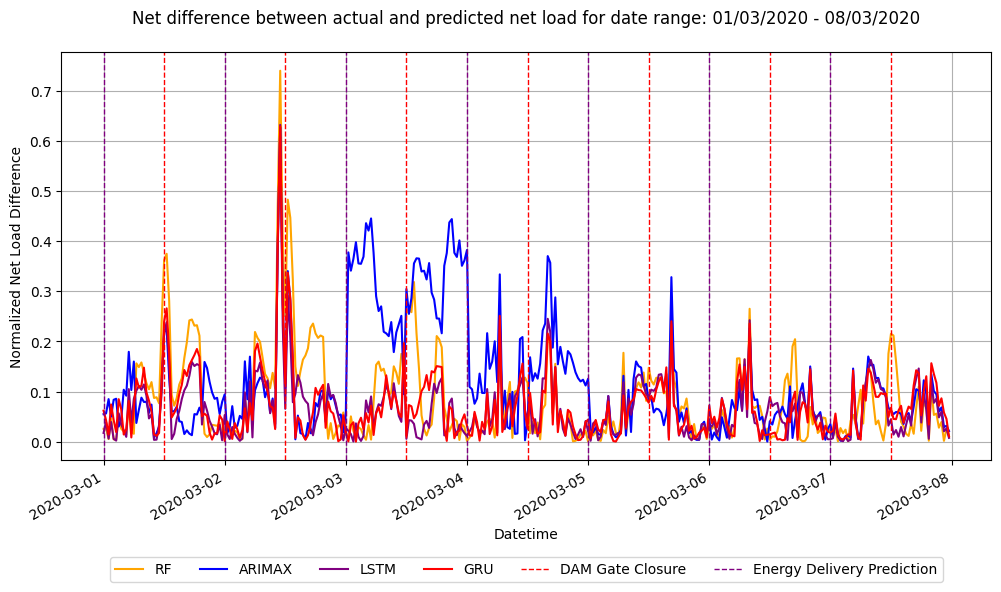

In [133]:
#plot all the net_diff_ columns over the 7 days 
plt.figure(figsize=(12, 6))
plt.plot(seven_day_plots_all.index, seven_day_plots_all["net_diff_RF"], label='RF', color='orange', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["net_diff_ARIMAX"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["net_diff_LSTM"], label='LSTM', color='purple', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["net_diff_GRU"], label='GRU', color='red', linewidth=1.5)

# Draw vertical lines for Dam Gate Closure and Energy Delivery Prediction
# For simplicity, I'll assume we add the lines within the already filtered date range
for day in pd.date_range(start=start_date, end=end_date):
    dam_closure_time = pd.Timestamp(day.strftime('%Y-%m-%d 12:00'))
    energy_delivery_time = pd.Timestamp(day.strftime('%Y-%m-%d 00:00'))
    plt.axvline(x=dam_closure_time, color='red', linestyle='--', linewidth=1, label='DAM Gate Closure' if day == pd.Timestamp(start_date) else "")
    plt.axvline(x=energy_delivery_time, color='purple', linestyle='--', linewidth=1, label='Energy Delivery Prediction' if day == pd.Timestamp(start_date) else "")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1, 9)))  # Only show ticks for these days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(plt.NullLocator())  # Disable minor ticks

plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Datetime', y=1.05)
plt.ylabel('Normalized Net Load Difference')
plt.title('Net difference between actual and predicted net load for date range: 01/03/2020 - 08/03/2020', y=1.05)
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))

plt.show()

#### Creat new collumns for the aggreagarted half hourly data into hourly ones 
#### Taking mean of half hourly net_difference

In [134]:
# create a new table from seven_day_plots_all that only contains only the ts collumns and net_diff_RF	net_diff_ARIMAX	net_diff_LSTM	net_diff_GRU with deepcopy
seven_day_plots_net_diff = seven_day_plots_all.copy(deep=True)
seven_day_plots_net_diff = seven_day_plots_net_diff[['net_diff_RF','net_diff_ARIMAX','net_diff_LSTM','net_diff_GRU']]
seven_day_plots_net_diff

,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU
ts,,,,
2020-03-01 00:00:00+00:00,0.025733,0.054950,0.017592,0.061966
2020-03-01 00:30:00+00:00,0.025947,0.056468,0.038943,0.042746
2020-03-01 01:00:00+00:00,0.005230,0.084973,0.006235,0.014277
2020-03-01 01:30:00+00:00,0.046513,0.050088,0.039271,0.074308
2020-03-01 02:00:00+00:00,0.004881,0.083639,0.005609,0.043449
...,...,...,...,...
2020-03-07 21:30:00+00:00,0.028002,0.059892,0.048517,0.071622
2020-03-07 22:00:00+00:00,0.039316,0.068419,0.059685,0.086598
2020-03-07 22:30:00+00:00,0.001698,0.029064,0.020884,0.058028


### Plot seven_day_plots_net_diff

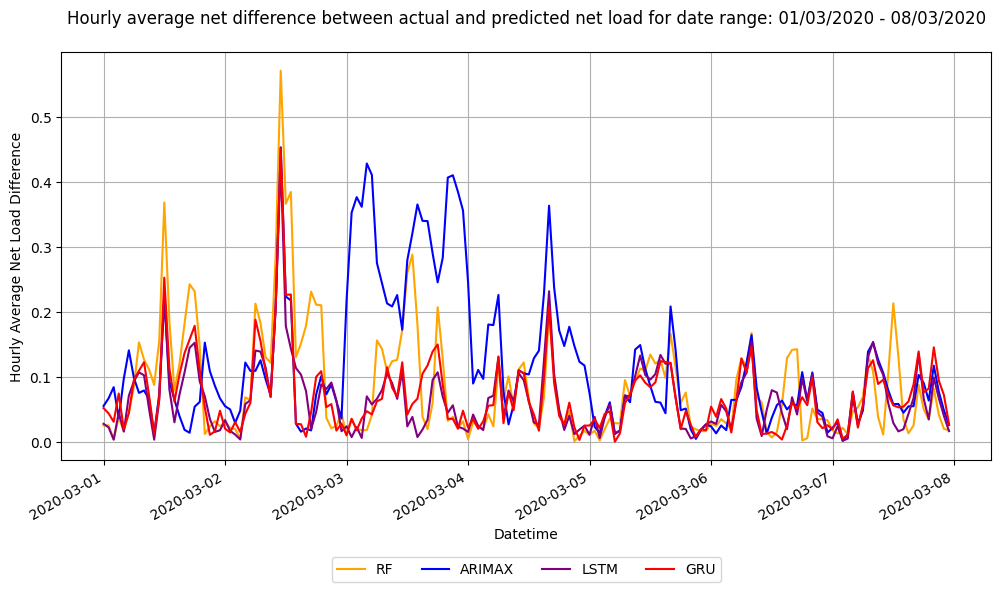

In [135]:
# Convert the index to datetime if it's not already
seven_day_plots_net_diff.index = pd.to_datetime(seven_day_plots_net_diff.index)

# Resample the DataFrame to hourly frequency and calculate the mean
hourly_avg = seven_day_plots_net_diff.resample('H').mean()

# Select the desired columns
columns_to_average = ['net_diff_RF', 'net_diff_ARIMAX', 'net_diff_LSTM', 'net_diff_GRU']
hourly_avg = hourly_avg[columns_to_average]

hourly_avg

# Plot the hourly average net load difference for each model
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg["net_diff_RF"], label='RF', color='orange', linewidth=1.5)
plt.plot(hourly_avg.index, hourly_avg["net_diff_ARIMAX"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(hourly_avg.index, hourly_avg["net_diff_LSTM"], label='LSTM', color='purple', linewidth=1.5)
plt.plot(hourly_avg.index, hourly_avg["net_diff_GRU"], label='GRU', color='red', linewidth=1.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1, 9)))  # Only show ticks for these days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(plt.NullLocator())  # Disable minor ticks

plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Datetime', y=1.05)
plt.ylabel('Hourly Average Net Load Difference')
plt.title('Hourly average net difference between actual and predicted net load for date range: 01/03/2020 - 08/03/2020', y=1.05)
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))

plt.show()



In [143]:
# Create a new collumn in hourly_avg that contains the average of all the net_diff columns
hourly_avg['average_net_diff'] = hourly_avg[['net_diff_RF', 'net_diff_ARIMAX', 'net_diff_LSTM', 'net_diff_GRU']].mean(axis=1)
hourly_avg

,net_diff_RF,net_diff_ARIMAX,net_diff_LSTM,net_diff_GRU,average_net_diff
ts,,,,,
2020-03-01 00:00:00+00:00,0.025840,0.055709,0.028267,0.052356,0.040543
2020-03-01 01:00:00+00:00,0.025871,0.067531,0.022753,0.044293,0.040112
2020-03-01 02:00:00+00:00,0.004190,0.084697,0.003920,0.031339,0.031036
2020-03-01 03:00:00+00:00,0.038047,0.037017,0.045775,0.074871,0.048927
2020-03-01 04:00:00+00:00,0.017049,0.097786,0.016238,0.019709,0.037695
...,...,...,...,...,...
2020-03-07 19:00:00+00:00,0.034927,0.063969,0.034999,0.082473,0.054092
2020-03-07 20:00:00+00:00,0.082323,0.117684,0.099684,0.145917,0.111402
2020-03-07 21:00:00+00:00,0.042019,0.077246,0.067190,0.094636,0.070273


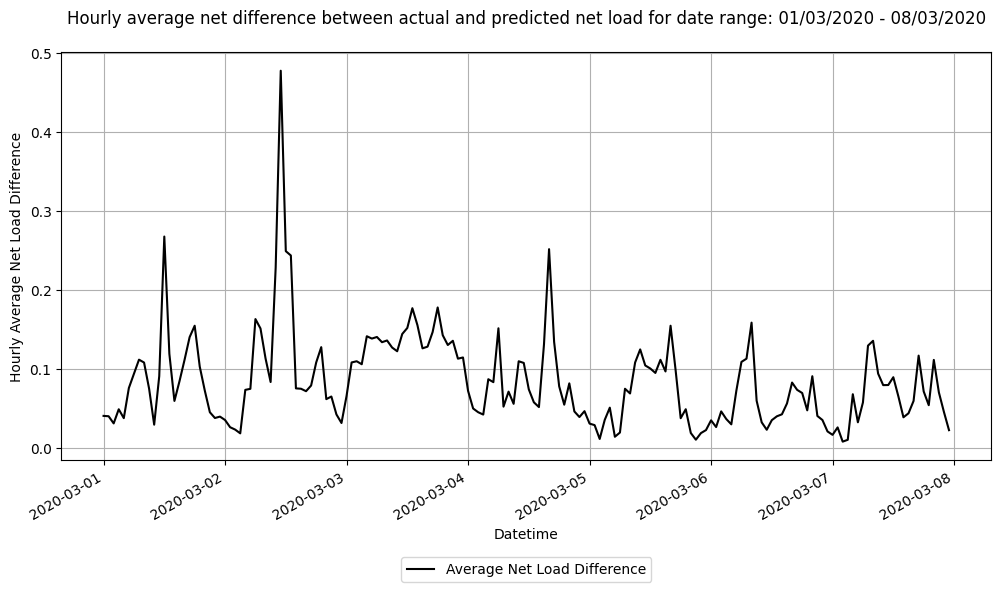

In [144]:
# plot average_net_diff 
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg["average_net_diff"], label='Average Net Load Difference', color='black', linewidth=1.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1, 9)))  # Only show ticks for these days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(plt.NullLocator())  # Disable minor ticks

plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Datetime', y=1.05)
plt.ylabel('Hourly Average Net Load Difference')
plt.title('Hourly average net difference between actual and predicted net load for date range: 01/03/2020 - 08/03/2020', y=1.05)
plt.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5, -0.22))

plt.show()



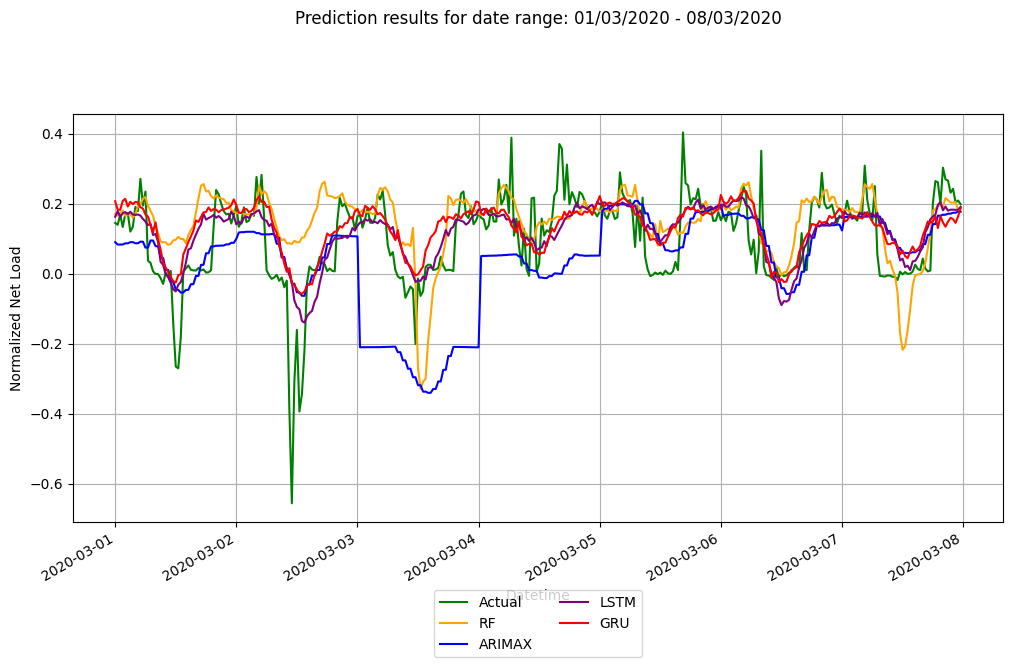

In [136]:
start_date = '2020-03-01'
end_date = '2020-03-07'

# Define the date format for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(seven_day_plots_all.index, seven_day_plots_all["atcual_net_load_norm"], label='Actual', color='green', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["RF_pred"], label='RF', color='orange', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["ARIMAX_pred"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["LSTM_pred"], label='LSTM', color='purple', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["GRU_pred"], label='GRU', color='red', linewidth=1.5)


ax = plt.gca()

# Use AutoDateLocator or adjust DayLocator
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically pick the dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, if you want to rotate the labels to make them more readable:
plt.gcf().autofmt_xdate()

# Add grid, labels, legend, and title
plt.grid(visible=True)
plt.xlabel('Datetime')
plt.ylabel('Normalized Net Load')
plt.title('Prediction results for date range: 01/03/2020 - 08/03/2020', y=1.20)
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Show plot
plt.show()

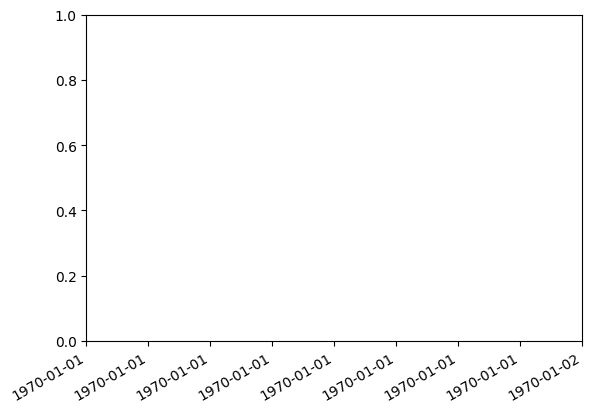

In [137]:
ax = plt.gca()

# Use AutoDateLocator or adjust DayLocator
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically pick the dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, if you want to rotate the labels to make them more readable:
plt.gcf().autofmt_xdate()

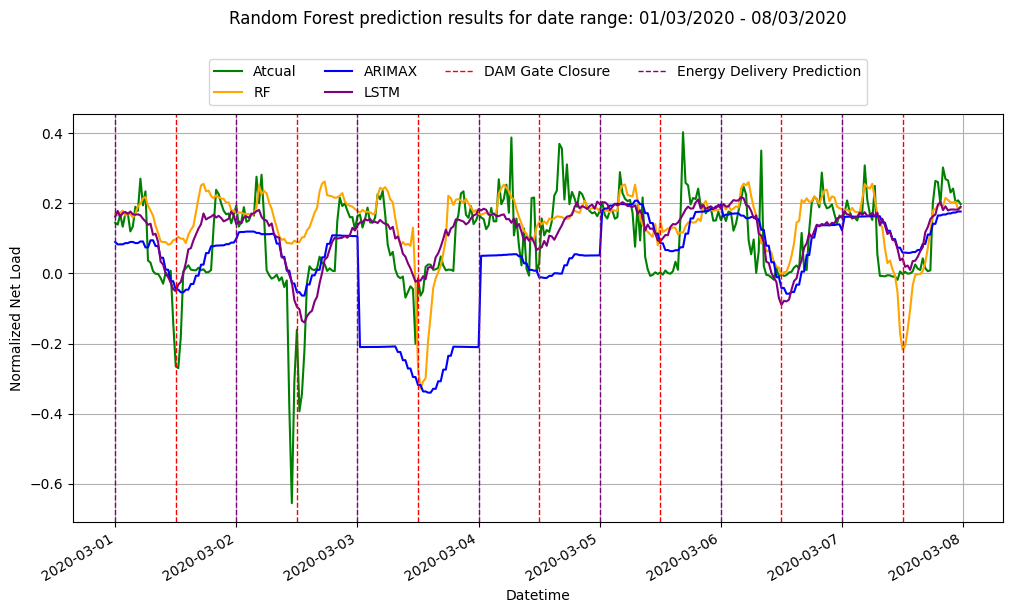

In [138]:
start_date = '2020-03-01'
end_date = '2020-03-07'

# Define the date format for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(seven_day_plots_all.index, seven_day_plots_all["atcual_net_load_norm"], label='Atcual', color='green', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["RF_pred"], label='RF', color='orange', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["ARIMAX_pred"], label='ARIMAX', color='blue', linewidth=1.5)
plt.plot(seven_day_plots_all.index, seven_day_plots_all["LSTM_pred"], label='LSTM', color='purple', linewidth=1.5)

# Draw vertical lines for Dam Gate Closure and Energy Delivery Prediction
# For simplicity, I'll assume we add the lines within the already filtered date range
for day in pd.date_range(start=start_date, end=end_date):
    dam_closure_time = pd.Timestamp(day.strftime('%Y-%m-%d 12:00'))
    energy_delivery_time = pd.Timestamp(day.strftime('%Y-%m-%d 00:00'))
    plt.axvline(x=dam_closure_time, color='red', linestyle='--', linewidth=1, label='DAM Gate Closure' if day == pd.Timestamp(start_date) else "")
    plt.axvline(x=energy_delivery_time, color='purple', linestyle='--', linewidth=1, label='Energy Delivery Prediction' if day == pd.Timestamp(start_date) else "")

# Define the date format for the x-axis and rotate for better readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Add grid, title, labels, and legend
plt.grid(visible=True)
plt.title('Random Forest prediction results for date range: 01/03/2020 - 08/03/2020', y=1.20)
plt.xlabel('Datetime')
plt.ylabel('Normalized Net Load')

# Customize and show the legend
# We use ncol to specify the number of columns in the legend
plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))

# Show plot
plt.show()

In [139]:
plot_predictions

NameError: name 'plot_predictions' is not defined